In [1]:
import os
import pandas as pd
import numpy as np

from collections import Counter
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Input
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras import metrics
from keras.optimizers import Adam, SGD

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_pickle('../dataset/SS/clean/withlabel_SPECTER.pkl')
df.head()

,title,abstract,relatedwork_text,main_text,rw_citations,full_citations,SPECTER_embeddings,label
paper_id,,,,,,,,
859921,Summarizing Reviews with Variable-length Synta...,Abstract. We present a novel summarization fra...,We first look at how text excerpts are extract...,Abstract. We present a novel summarization fra...,"[5965756, 1599046, 3177797, 444032, 6884774]","[1599046, 11055565, 16393334, 2481864, 5965756...","[-0.7218136, 0.99761677, -0.27647057, 0.235195...",2
129124,Can Document Selection Help Semi-supervised Le...,Annotating training data for event extraction ...,Self-training has been applied to several natu...,Annotating training data for event extraction ...,"[1398439, 7419156, 11187670, 8336242, 15894892...","[1398439, 7419156, 7579604, 11187670, 8336242,...","[-0.46521527, 0.17172785, 0.27331015, 0.088347...",2
1345235,Optimizing Sparse Matrix–Vector Product Comput...,Large-scale scientific applications frequently...,A variety of different data and computation re...,Large-scale scientific applications frequently...,"[1794629, 9580801, 120335238, 15090599, 208582...","[1794629, 9580801, 120335238, 15090599, 208582...","[-0.16910633, 0.8334114, 0.039647657, -0.09229...",3
2624639,Enhanced Chosen-Ciphertext Security and Applic...,We introduce and study a new notion of enhance...,ECCA is similar in spirit to coin-revealing se...,We introduce and study a new notion of enhance...,"[41204165, 19655, 235427, 226828, 3148885]","[443317, 41204165, 7113862, 10098664, 226828, ...","[0.12169194, 0.04154425, 0.2388953, 0.03814739...",1
146120525,ARSM: Augment-REINFORCE-Swap-Merge Estimator f...,To address the challenge of backpropagating th...,"For optimizing (1) for categorical z, the diff...",To address the challenge of backpropagating th...,"[3535369, 5859948, 1758804, 10756562, 19115634...","[121929631, 4043645, 5859948, 7195970, 1075656...","[-0.8591176, 0.8032798, -0.012844058, 0.021643...",2


In [3]:
Counter(df['label'])

Counter({2: 4160, 3: 4914, 1: 4047, 0: 7807, 4: 6489})

In [4]:
df_cluster = df.loc[df.label == 2]
df_cluster.head()

,title,abstract,relatedwork_text,main_text,rw_citations,full_citations,SPECTER_embeddings,label
paper_id,,,,,,,,
859921,Summarizing Reviews with Variable-length Synta...,Abstract. We present a novel summarization fra...,We first look at how text excerpts are extract...,Abstract. We present a novel summarization fra...,"[5965756, 1599046, 3177797, 444032, 6884774]","[1599046, 11055565, 16393334, 2481864, 5965756...","[-0.7218136, 0.99761677, -0.27647057, 0.235195...",2
129124,Can Document Selection Help Semi-supervised Le...,Annotating training data for event extraction ...,Self-training has been applied to several natu...,Annotating training data for event extraction ...,"[1398439, 7419156, 11187670, 8336242, 15894892...","[1398439, 7419156, 7579604, 11187670, 8336242,...","[-0.46521527, 0.17172785, 0.27331015, 0.088347...",2
146120525,ARSM: Augment-REINFORCE-Swap-Merge Estimator f...,To address the challenge of backpropagating th...,"For optimizing (1) for categorical z, the diff...",To address the challenge of backpropagating th...,"[3535369, 5859948, 1758804, 10756562, 19115634...","[121929631, 4043645, 5859948, 7195970, 1075656...","[-0.8591176, 0.8032798, -0.012844058, 0.021643...",2
9446888,Coupled Sequence Labeling on Heterogeneous Ann...,In order to effectively utilize multiple datas...,This work is partially inspired by Qiu et al. ...,In order to effectively utilize multiple datas...,"[7527306, 917949, 5517166, 2037646, 14014145, ...","[2082658, 7527306, 125278, 5517166, 2037646, 1...","[-1.1032728, 1.5418842, 0.21867846, -0.0536259...",2
6961896,"TAG, Dynamic Programming, and the Perceptron f...",We describe a parsing approach that makes use ...,Previous work has made use of various restrict...,We describe a parsing approach that makes use ...,"[803811, 405878, 5897173, 11599080, 8313435, 1...","[13163488, 405878, 1131864, 8313435, 14759233,...","[-0.1104926, 0.70815295, 0.29344887, 0.1006494...",2


In [5]:
# Multi hot encoding for related works citations
mlb = MultiLabelBinarizer(sparse_output=True)

Y = pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(df_cluster['rw_citations']),
                index=df_cluster.index,
                columns=mlb.classes_)
Y.columns = Y.columns.astype(str)

In [6]:
Y.sum().value_counts()[0:20]

1     13616
2      2673
3      1057
4       489
5       272
6       185
7       108
8        83
9        54
10       51
11       32
13       24
12       24
14       16
15       11
18       10
17        9
19        8
23        5
20        5
dtype: int64

In [7]:
Y.sum().value_counts().sum()

18784

In [8]:
#Filter out papers that are not cited at least a few times
Y = Y[Y.columns[Y.sum() > 3]]
Y

,10011032,10086161,10091362,10097073,10109001,10138069,10168779,1017389,102483628,10251072,...,9901844,990233,9904828,9912528,9926549,9945908,9952653,995282,9963298,9973484
paper_id,,,,,,,,,,,,,,,,,,,,,
859921,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
129124,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
146120525,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9446888,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6961896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428574,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7151908,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3071736,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#Remove papers with less than 1 cited papers after filter
Y = Y.loc[Y.sum(axis=1) > 1]
Y.shape

(2360, 1438)

In [10]:
X = pd.DataFrame(df_cluster['SPECTER_embeddings'].to_list(), index= df_cluster.index)

#Filter out the same rows for predictive variables as well
X = X[X.index.isin(Y.index)]
X.head()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
paper_id,,,,,,,,,,,,,,,,,,,,,
859921,-0.721814,0.997617,-0.276471,0.235195,0.574554,-0.392817,1.591181,0.727794,0.155663,0.375171,...,-0.242618,-1.441712,1.090646,0.473320,0.494900,-0.252703,-0.140182,0.788057,0.699724,0.613336
129124,-0.465215,0.171728,0.273310,0.088347,0.150821,0.014246,0.769428,0.879140,0.302492,1.411566,...,-0.537449,-0.562110,0.264774,0.552685,0.134727,-0.398473,0.653622,0.170898,0.006523,0.951027
6961896,-0.110493,0.708153,0.293449,0.100649,-0.239053,-0.419631,0.337338,1.263192,0.385000,0.059813,...,-0.368573,-1.094842,0.945371,0.783154,-1.420928,-0.539113,0.675971,-0.035023,0.743923,0.263745
204401827,-0.720468,1.035156,-0.242936,0.444445,0.529560,0.288380,0.453285,0.760440,1.412460,0.622353,...,0.929984,-1.473590,1.170157,1.263471,0.519642,0.344423,-0.128239,1.210154,0.405058,2.580185
2747778,-0.213032,0.791420,0.574112,0.198889,1.109502,-0.391129,1.725121,0.081582,0.213434,1.203329,...,-0.845504,-1.617514,0.284126,0.629653,-0.050838,-0.528791,0.487303,0.736766,0.086150,1.263139


In [11]:
print(X.shape)
print(Y.shape)

(2360, 768)
(2360, 1438)


In [12]:
#Create train set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

In [13]:
#Create train set and validation set
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=1)

In [14]:
print(X_train.shape)
print(Y_train.shape)

(1805, 768)
(1805, 1438)


# NN Model

In [15]:
batch_size = 256
num_classes = Y_train.shape[1]
epochs = 100

In [16]:
Y_test.shape

(354, 1438)

In [17]:
embedding_dim = X_train.shape[1]

model = Sequential()
model.add(Dense(256, input_dim=embedding_dim, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               196864    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1438)              369566    
Total params: 566,430
Trainable params: 566,430
Non-trainable params: 0
_________________________________________________________________


In [18]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=10)
history = model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    callbacks=[es],
                    validation_data=(X_val, Y_val))

Epoch 1/100
8/8 [==============================] - 0s 30ms/step - loss: 0.0221 - accuracy: 0.0022 - val_loss: 0.0233 - val_accuracy: 0.0050
Epoch 2/100
8/8 [==============================] - 0s 13ms/step - loss: 0.0217 - accuracy: 0.0022 - val_loss: 0.0230 - val_accuracy: 0.0100
Epoch 3/100
8/8 [==============================] - 0s 13ms/step - loss: 0.0214 - accuracy: 0.0066 - val_loss: 0.0227 - val_accuracy: 0.0050
Epoch 4/100
8/8 [==============================] - 0s 13ms/step - loss: 0.0210 - accuracy: 0.0078 - val_loss: 0.0225 - val_accuracy: 0.0050
Epoch 5/100
8/8 [==============================] - 0s 13ms/step - loss: 0.0206 - accuracy: 0.0100 - val_loss: 0.0222 - val_accuracy: 0.0149
Epoch 6/100
8/8 [==============================] - 0s 13ms/step - loss: 0.0202 - accuracy: 0.0127 - val_loss: 0.0219 - val_accuracy: 0.0149
Epoch 7/100
8/8 [==============================] - 0s 13ms/step - loss: 0.0198 - accuracy: 0.0150 - val_loss: 0.0216 - val_accuracy: 0.0149
Epoch 8/100
8/8 [===

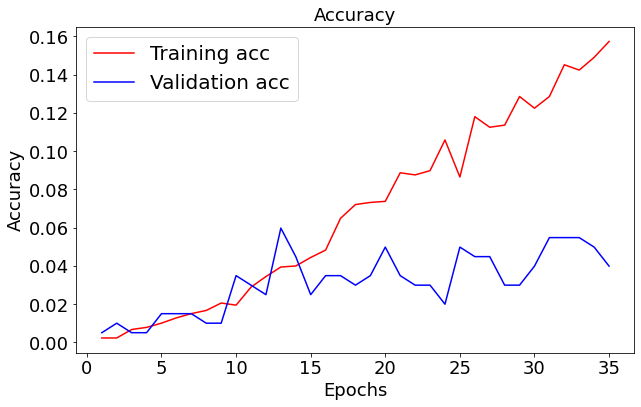

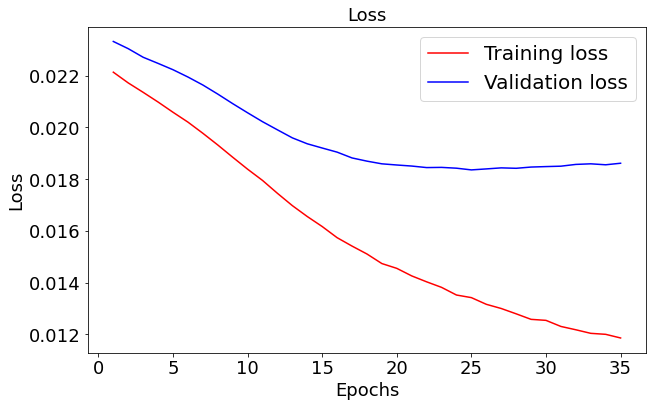

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

fig, ax = plt.subplots(1,1, figsize=(10,6))

ax.plot(epochs, acc, 'r', label='Training acc')
ax.plot(epochs, val_acc, 'b', label='Validation acc')
ax.set_title('Accuracy', fontsize=18)
ax.set_xlabel(r'Epochs', fontsize=18)
ax.set_ylabel(r'Accuracy', fontsize=18)
ax.tick_params(labelsize=18)
ax.legend(fontsize=20)

plt.show()

figL, axL = plt.subplots(1,1, figsize=(10,6))

axL.plot(epochs, loss, 'r', label='Training loss')
axL.plot(epochs, val_loss, 'b', label='Validation loss')
axL.set_title('Loss', fontsize=18)
axL.set_xlabel(r'Epochs', fontsize=18)
axL.set_ylabel(r'Loss', fontsize=18)
axL.tick_params(labelsize=18)
axL.legend(fontsize=20)

plt.show()

# Model Evaluation with Information Retrieval Metrics

In [20]:
from src.metric_utils import MAP_score
from src.metric_utils import Recall_score

In [21]:
#Get probabilities for each citation
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

In [22]:
train_MAP, test_MAP = MAP_score(Y_train, Y_test, train_predictions, test_predictions, top_k=5)

print("Training MAP Score: ", train_MAP)
print("Test MAP Score: ", test_MAP)

Training MAP Score:  0.39516759002770085
Test MAP Score:  0.09740505335844318


In [23]:
train_recall, test_recall = Recall_score(Y_train, Y_test, train_predictions, test_predictions, top_k=10)

print("Training Recall Score @10:", train_recall)
print("Test Recall Score @10:", test_recall)

Training Recall Score @10: 0.7889237167789392
Test Recall Score @10: 0.266969494723732


In [24]:
train_recall, test_recall = Recall_score(Y_train, Y_test, train_predictions, test_predictions, top_k=20)

print("Training Recall Score @20:", train_recall)
print("Test Recall Score @20:", test_recall)

Training Recall Score @20: 0.8888361590431005
Test Recall Score @20: 0.38855065210997414


In [25]:
train_recall, test_recall = Recall_score(Y_train, Y_test, train_predictions, test_predictions, top_k=50)

print("Training Recall Score @50:", train_recall)
print("Test Recall Score @50:", test_recall)

Training Recall Score @50: 0.9667515964472947
Test Recall Score @50: 0.5528663662138239


In [26]:
train_recall, test_recall = Recall_score(Y_train, Y_test, train_predictions, test_predictions, top_k=100)

print("Training Recall Score @100:", train_recall)
print("Test Recall Score @100:", test_recall)

Training Recall Score @100: 0.9895231682028977
Test Recall Score @100: 0.6756107828141726
